In [109]:
# LendingClub Data content check
# Two sources of data and a data dictionary
# Data in CSV and SQL files are provided - Kaggle
# Looks like FICO score data is missing and some column names are different
import sqlite3
import csv
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np

dataURL = 'https://www.kaggle.com/wendykan/lending-club-loan-data/downloads/lending-club-loan-data.zip'
homeDir = "/fdata/LendingClub/lending-club-loan-data/"
fnSQL = "database.sqlite"
fnCSV = "loan.csv"


In [2]:
# get column of data from CSV file
def getCSVColumn(header):
    try:
        indx = cnCSV.index(header)
        with open(homeDir+fnCSV) as csvfile:
            reader = csv.reader(csvfile)
            tcol = list(zip(*reader))[indx]
            col = list(tcol)
            col.pop(0)
            return col
    except ValueError:
        print("Column not found:", header)
        col = []
        return col

# get column of data from SQLite file
def getSQLiteColumn(header):
    col = []
    conn = sqlite3.connect(homeDir+fnSQL)
    cursor = conn.execute('SELECT ' + header + ' FROM loan')
    for row in cursor.fetchall():
        col.append(row[0])
    return col


In [3]:
# read in column names from sqlite data base
conn = sqlite3.connect(homeDir+fnSQL)

cursor = conn.execute('select * from loan')

cnSQL = [description[0] for description in cursor.description]
print(len(cnSQL))
print(cnSQL)
conn.close()
# 75 Data Columns

75
['index', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12

In [4]:
# read in data names from LCDataDictionary.csv -- from LCDataDictionary.xlsx
cnDict = []
with open(homeDir+"LCDataDictionary.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    for row in reader:
        cnDict.append(row[0])
cnDict[:] = [item for item in cnDict if item != '']
print(len(cnDict))
print(cnDict)
print()
# 79 Data Columns

79
['LoanStatNew', 'addr_state', 'acc_now_delinq', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'desc', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'is_inc_v', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'next_pymnt_d', 'open_acc', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', '

In [6]:
# read in column names from loan.csv
with open(homeDir+fnCSV) as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    cnCSV = next(reader)[0].split(',')
print(len(cnCSV))
print(cnCSV)
# 74 Data Columns

74
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open

In [7]:
# what columns are in dictionary but not in data sources
cnamesDif1 = set(cnDict).symmetric_difference(set(cnSQL))
cnamesDif2 = set(cnDict).symmetric_difference(set(cnCSV))
print(cnamesDif1)
print()
print(cnamesDif2)
# FICO scores are missing - 4 columns
# three others are  LoanStatNew    Description (from dictionary)
#                   verified_status_joint same as verification_status_joint
#                   is_inc_v - same as verification_status

# what are column differences in data sources
cnamesDif3 = set(cnSQL).symmetric_difference(set(cnCSV))
print()
print(cnamesDif3)
# SQL has an index


{'last_fico_range_low', 'fico_range_high', 'verified_status_joint', 'verification_status_joint', 'index', 'last_fico_range_high', 'LoanStatNew', 'fico_range_low', 'verification_status', 'is_inc_v'}

{'last_fico_range_low', 'fico_range_high', 'verified_status_joint', 'verification_status_joint', 'last_fico_range_high', 'LoanStatNew', 'fico_range_low', 'verification_status', 'is_inc_v'}

{'index'}


In [ ]:
# total amount loaned and average loan amount
loan_amnt = getCSVColumn('loan_amnt')
#print(loan_amnt.count(''))
la_float = map(float,loan_amnt)
tloans = sum(la_float)
aloans = tloans/len(loan_amnt)
print("Total amount of loans: $"+str(tloans))
print("Average loan: $"+str(aloans))

In [42]:
# look at loan status column
LSCol = getCSVColumn('loan_status')
ids = len(LSCol)
lstat = list(set(LSCol))
# 10 different loan statuses
scounts = [LSCol.count(x) for x in lstat]
lstatuses = pd.DataFrame(list(zip(lstat,scounts)),columns=['Status','Count']).\
            sort_values(by='Count',ascending=0).reset_index(drop=True)
print(lstatuses)

                                              Status   Count
0                                            Current  601779
1                                         Fully Paid  207723
2                                        Charged Off   45248
3                                 Late (31-120 days)   11591
4                                             Issued    8460
5                                    In Grace Period    6253
6                                  Late (16-30 days)    2357
7  Does not meet the credit policy. Status:Fully ...    1988
8                                            Default    1219
9  Does not meet the credit policy. Status:Charge...     761


In [63]:
# look at sub_grade column
SGradeCol = getCSVColumn('sub_grade')
ids = len(SGradeCol)
sgrade = list(set(SGradeCol))
# 35 different Sub Grades
#print(len(sgrade))
sgradecounts = [SGradeCol.count(x) for x in sgrade]
lsgrade = pd.DataFrame(list(zip(sgrade,sgradecounts)),columns=['Sub Grade','Count']).\
            sort_values(by='Sub Grade',ascending=1).reset_index(drop=True)
#print(lsgrade)

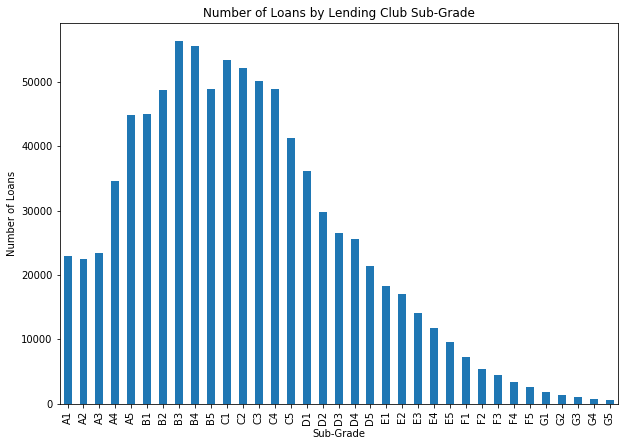

In [164]:
sgplt = lsgrade['Count'].plot(kind='bar',title='Number of Loans by Lending Club Sub-Grade',figsize=(10,7))
sgplt.set_xlabel('Sub-Grade')
sgplt.set_ylabel('Number of Loans')
sgplt.set_xticklabels(lsgrade['Sub Grade'])
plt.show()

In [142]:
# Look at the relationship between Sub-Grade and Status
# How well does the Grade assigned by Lending Club predict Loan Performance?
#SGradeCol -- Sub Grade
#LSCol -- Loan Status
GPerform = pd.DataFrame(list(zip(SGradeCol,LSCol)),columns=['Sub Grade','Loan Status'])
print(GPerform.head())

  Sub Grade  Loan Status
0        B2   Fully Paid
1        C4  Charged Off
2        C5   Fully Paid
3        C1   Fully Paid
4        B5      Current


In [145]:
# Generate dataframe containing counts of statuses for each sub grade
# Since there are no values I couldn't find a standard way to do this
# This is pretty compact and does only one pass through GPerform
# Still takes a long time to run
a = np.zeros(shape=(35,11))
cols = ['Sub Grade'] + lstat
SvsSG = pd.DataFrame(a,columns=cols)
sgsorted = sgrade.sort()
SvsSG['Sub Grade'] = sgrade
SvsSG.set_index('Sub Grade',inplace=True)
for indx, row in GPerform.iterrows():
    a = row[0]
    b = row[1]
    SvsSG.loc[a].loc[b] += 1
print(SvsSG)


           Does not meet the credit policy. Status:Charged Off  Charged Off  \
Sub Grade                                                                     
A1                                                       0.0          181.0   
A2                                                       3.0          277.0   
A3                                                       0.0          399.0   
A4                                                       0.0          779.0   
A5                                                       5.0          981.0   
B1                                                      15.0         1213.0   
B2                                                      11.0         1593.0   
B3                                                      12.0         2259.0   
B4                                                      23.0         2323.0   
B5                                                      24.0         2131.0   
C1                                                  

In [146]:
# takes a long time to generate -- pickle it
SvsSG.to_pickle(homeDir+'StatusVsGrade.pkl')

In [187]:
# Load it back in
SvsSG = pd.read_pickle(homeDir+'StatusVsGrade.pkl')
print(SvsSG.head())

           Does not meet the credit policy. Status:Charged Off  Charged Off  \
Sub Grade                                                                     
A1                                                       0.0          181.0   
A2                                                       3.0          277.0   
A3                                                       0.0          399.0   
A4                                                       0.0          779.0   
A5                                                       5.0          981.0   

           Default  Late (31-120 days)  Late (16-30 days)  Fully Paid  Issued  \
Sub Grade                                                                       
A1             0.0                31.0               15.0      5689.0   322.0   
A2             6.0                64.0               17.0      5925.0   233.0   
A3             7.0                72.0               20.0      6774.0   206.0   
A4            11.0               115.0   

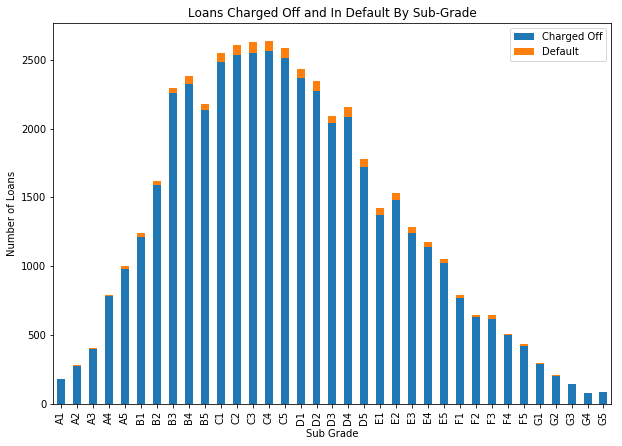

In [188]:
# This is not too interesting -- Percentage of Total Loans in Grade might provide more insight
badplt = SvsSG[['Charged Off','Default']].plot(kind='bar',stacked=True,title='Loans Charged Off and In Default By Sub-Grade',figsize=(10,7))
badplt.set_ylabel('Number of Loans')
plt.show()

In [219]:
# Calculate percentage of loans charged off and in default in each sub grade
# make a copy
sgtots = lsgrade['Count']
percent = SvsSG
percent['Count'] = list(lsgrade['Count'])
percent = percent.div(percent['Count']/100.0,axis='index')    
#print(percent.head())

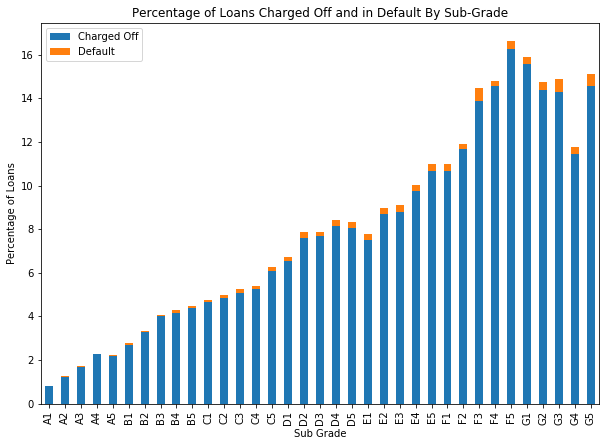

The grading system used by Lending Club appears to be reasonable


In [223]:
# plot them in stacked bar chart
pplt0 = percent[['Charged Off','Default']].plot(kind='bar',stacked=True,title='Percentage of Loans Charged Off and in Default By Sub-Grade',figsize=(10,7))
pplt0.set_ylabel('Percentage of Loans')
plt.show()
print('The grading system used by Lending Club appears to be reasonable')